## FNNNeurons: Fully Connected Neural Network - Varying Neuron Epoch

### Goal: Here, the investigation will focus on the varying neuron layer network, but looking into the epochs to see the active learning. 

### 0. Imports

In [20]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torch import optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import scipy
import numpy as np
from scipy import stats

### 1. Read Data

In [21]:
mushroom_data = pd.read_csv('raw_data/mushroom_cleaned.csv')
mushroom_data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


### 2. Prepare Data

In [22]:
X = mushroom_data.drop(columns=['class'])
y = mushroom_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# convert to tensors
X_train_tensor = torch.tensor(X_train, dtype = torch.float32)
X_test_tensor = torch.tensor(X_test, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train, dtype = torch.float32)
y_test_tensor = torch.tensor(y_test, dtype = torch.float32)

### 3. Create NN

#### 3.1: 8 Neurons

In [23]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 8)
        self.fc2 = nn.Linear(8, 16)
        self.fc3 = nn.Linear(16,32)
        self.fc4 = nn.Linear(32,16)
        self.fc5 = nn.Linear(16,8)
        self.output_layer = nn.Linear(8, 1)


    # feedforward function
    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        x = torch.relu(x)
        x = self.fc4(x)
        x = torch.relu(x)
        x = self.fc5(x)
        x = torch.relu(x)
        x = self.output_layer(x)
        return x

#### 4. Train Model

##### 4.1: 8 Neurons

In [60]:
# variables needed
input_size = X_train.shape[1]

# initialize model
model = NeuralNetwork(input_size)

# loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), 0.001)

# training accuracy tracker
train_accuracy = {"epoch": [], "accuracy": []}
weights_by_epoch = {"epoch": [], "weights_l1": [], "weights_l2": [], "weights_l3": [], "weights_l4": [], "weights_l5": []}

# number of training loops
epochs = 5000

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    output = model(X_train_tensor)


    y_train_tensor = y_train_tensor.view(-1, 1)
    loss = criterion(output, y_train_tensor)

    loss.backward()

    optimizer.step()
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            model.eval()

            outputs = model(X_train_tensor)
            probabilities = torch.sigmoid(outputs)

            predictions = (probabilities > 0.5).float()

            accuracy = (y_train_tensor.flatten() == predictions.flatten()).float().mean()

            train_accuracy["epoch"].append(epoch)
            train_accuracy["accuracy"].append(accuracy.item())
            weights_by_epoch["epoch"].append(epoch)
            weights_by_epoch["weights_l1"].append(model.fc1.weight.data.numpy().flatten())
            weights_by_epoch["weights_l2"].append(model.fc2.weight.data.numpy().flatten())
            weights_by_epoch["weights_l3"].append(model.fc3.weight.data.numpy().flatten())
            weights_by_epoch["weights_l4"].append(model.fc4.weight.data.numpy().flatten())
            weights_by_epoch["weights_l5"].append(model.fc5.weight.data.numpy().flatten())
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy.item()* 100:.2f}%')
        

model_train_acc = accuracy

Epoch [10/5000], Loss: 0.7003, Accuracy: 46.46%
Epoch [20/5000], Loss: 0.6838, Accuracy: 54.58%
Epoch [30/5000], Loss: 0.6786, Accuracy: 56.29%
Epoch [40/5000], Loss: 0.6740, Accuracy: 57.91%
Epoch [50/5000], Loss: 0.6713, Accuracy: 59.12%
Epoch [60/5000], Loss: 0.6687, Accuracy: 59.44%
Epoch [70/5000], Loss: 0.6651, Accuracy: 60.23%
Epoch [80/5000], Loss: 0.6608, Accuracy: 61.21%
Epoch [90/5000], Loss: 0.6585, Accuracy: 61.89%
Epoch [100/5000], Loss: 0.6566, Accuracy: 62.02%
Epoch [110/5000], Loss: 0.6546, Accuracy: 62.05%
Epoch [120/5000], Loss: 0.6529, Accuracy: 62.11%
Epoch [130/5000], Loss: 0.6513, Accuracy: 62.24%
Epoch [140/5000], Loss: 0.6500, Accuracy: 62.30%
Epoch [150/5000], Loss: 0.6488, Accuracy: 62.32%
Epoch [160/5000], Loss: 0.6476, Accuracy: 62.38%
Epoch [170/5000], Loss: 0.6465, Accuracy: 62.52%
Epoch [180/5000], Loss: 0.6455, Accuracy: 62.51%
Epoch [190/5000], Loss: 0.6444, Accuracy: 62.61%
Epoch [200/5000], Loss: 0.6435, Accuracy: 62.63%
Epoch [210/5000], Loss: 0.642

### 5. Evaluation

##### 5.1: 8 Neurons

In [61]:
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    
    probabilities = torch.sigmoid(outputs)

    predictions = (probabilities > 0.5).float()

    accuracy = (y_test_tensor.flatten() == predictions.flatten()).float().mean()

print(f"Accuracy: {accuracy.item()* 100:.2f}%")
model_test_acc = accuracy.item()*100

Accuracy: 76.53%


#### 6. Weight Investigation

##### 6.1: 8 Neurons

In [62]:
# dictionary to hold names and weights associated with each layer
model_dict = {"name":[], "weights":[]}

for name, param in model.state_dict().items():
    model_dict["name"].append(name)
    model_dict["weights"].append(param.data.numpy())

##### 6.2: 5 Layers by Epoch

In [63]:
weights_by_epoch_df = pd.DataFrame(weights_by_epoch)
weights_by_epoch_df.head()

,epoch,weights_l1,weights_l2,weights_l3,weights_l4,weights_l5
0,9,"[-0.2710713, 0.08671975, -0.15113024, -0.15367...","[0.14328912, -0.3513225, 0.007909613, -0.10301...","[-0.16531788, 0.22731799, 0.014278244, 0.14025...","[0.0039838254, 0.027097031, -0.07541015, -0.11...","[-0.028047293, -0.20604987, 0.16748032, 0.0368..."
1,19,"[-0.2710713, 0.08671975, -0.15113024, -0.15367...","[0.14328912, -0.3513225, -0.0021595524, -0.103...","[-0.16323839, 0.22731799, 0.016234586, 0.14220...","[0.0039838254, 0.027097031, -0.07541015, -0.11...","[-0.028047293, -0.20683993, 0.1659289, 0.03688..."
2,29,"[-0.2710713, 0.08671975, -0.15113024, -0.15367...","[0.14328912, -0.3513225, -0.012587912, -0.1030...","[-0.16154382, 0.22731799, 0.017549044, 0.14352...","[0.0039838254, 0.027097031, -0.07541015, -0.11...","[-0.028047293, -0.2071428, 0.16532984, 0.03688..."
3,39,"[-0.2710713, 0.08671975, -0.15113024, -0.15367...","[0.14328912, -0.3513225, -0.024205782, -0.1030...","[-0.16068451, 0.22731799, 0.018075086, 0.14404...","[0.0039838254, 0.027097031, -0.07541015, -0.11...","[-0.028047293, -0.20726198, 0.16526896, 0.0368..."
4,49,"[-0.2710713, 0.08671975, -0.15113024, -0.15367...","[0.14328912, -0.3513225, -0.03594598, -0.10301...","[-0.16033764, 0.22731799, 0.018248012, 0.14423...","[0.0039838254, 0.027097031, -0.07541015, -0.11...","[-0.028047293, -0.20730844, 0.16638403, 0.0368..."


In [64]:
less_weights_by_epoch_df = weights_by_epoch_df[::20]
less_accuracy_by_epoch_df = train_accuracy['accuracy'][::20]
less_weights_by_epoch_df

,epoch,weights_l1,weights_l2,weights_l3,weights_l4,weights_l5
0,9,"[-0.2710713, 0.08671975, -0.15113024, -0.15367...","[0.14328912, -0.3513225, 0.007909613, -0.10301...","[-0.16531788, 0.22731799, 0.014278244, 0.14025...","[0.0039838254, 0.027097031, -0.07541015, -0.11...","[-0.028047293, -0.20604987, 0.16748032, 0.0368..."
20,209,"[-0.2710713, 0.08671975, -0.15113024, -0.15367...","[0.14328912, -0.3513225, -0.032321606, -0.1030...","[-0.15711553, 0.22731799, 0.013354651, 0.14159...","[0.0039838254, 0.027097031, -0.07541015, -0.11...","[-0.028047293, -0.20733713, 0.1812787, 0.03688..."
40,409,"[-0.2710713, 0.08671975, -0.15113024, -0.15367...","[0.14328912, -0.3513225, 0.013164229, -0.10301...","[-0.14511171, 0.22731799, 0.011088352, 0.14184...","[0.0039838254, 0.027097031, -0.07541015, -0.11...","[-0.028047293, -0.20733713, 0.18110172, 0.0368..."
60,609,"[-0.2710713, 0.08671975, -0.15113024, -0.15367...","[0.14328912, -0.3513225, 0.029080544, -0.10301...","[-0.14492235, 0.22731799, 0.012500039, 0.14631...","[0.0039838254, 0.027097031, -0.07541015, -0.11...","[-0.028047293, -0.20733713, 0.1785041, 0.03688..."
80,809,"[-0.2710713, 0.08671975, -0.15113024, -0.15367...","[0.14328912, -0.3513225, 0.037040465, -0.10301...","[-0.14318216, 0.22731799, 0.014670956, 0.14998...","[0.0039838254, 0.027097031, -0.07541015, -0.11...","[-0.028047293, -0.20733455, 0.17548057, 0.0368..."
100,1009,"[-0.2710713, 0.08671975, -0.15113024, -0.15367...","[0.14328912, -0.3513225, 0.03277634, -0.103017...","[-0.13527681, 0.22731799, 0.015282175, 0.15132...","[0.0039838254, 0.027097031, -0.07541015, -0.11...","[-0.028047293, -0.20733137, 0.17956349, 0.0368..."
120,1209,"[-0.2710713, 0.08671975, -0.15113024, -0.15367...","[0.14328912, -0.3513225, 0.027561184, -0.10301...","[-0.1357495, 0.22731799, 0.0157771, 0.15192315...","[0.0039838254, 0.027097031, -0.07541015, -0.11...","[-0.028047293, -0.20733137, 0.17880161, 0.0368..."
140,1409,"[-0.2710713, 0.08671975, -0.15113024, -0.15367...","[0.14328912, -0.3513225, 0.026575474, -0.10301...","[-0.14073744, 0.22731799, 0.019100597, 0.15479...","[0.0039838254, 0.027097031, -0.07541015, -0.11...","[-0.028047293, -0.20732968, 0.16814034, 0.0385..."
160,1609,"[-0.2710713, 0.08671975, -0.15113024, -0.15367...","[0.14328912, -0.3513225, 0.022860296, -0.10301...","[-0.15165998, 0.22731799, 0.021933425, 0.15676...","[0.003986214, 0.027129274, -0.07541015, -0.119...","[-0.028047107, -0.2073254, 0.159011, 0.0386280..."
180,1809,"[-0.2710713, 0.08671975, -0.15113024, -0.15367...","[0.14328912, -0.3513225, 0.0219114, -0.1030171...","[-0.16625237, 0.22731799, 0.02219264, 0.156285...","[-0.021607684, 0.0056175357, -0.07541015, -0.1...","[-0.039548665, -0.2073254, 0.15912823, 0.03862..."


In [65]:
condensed_weights_by_epoch_df = less_weights_by_epoch_df.copy()
condensed_weights_by_epoch_df['all_weights_combined'] = condensed_weights_by_epoch_df[['weights_l1', 'weights_l2', 'weights_l3', 'weights_l4', 'weights_l5']].apply(lambda x: np.concatenate(x), axis=1)
condensed_weights_by_epoch_df = condensed_weights_by_epoch_df.drop(columns=['weights_l1', 'weights_l2', 'weights_l3', 'weights_l4', 'weights_l5'])
condensed_weights_by_epoch_df.head()

/var/folders/tx/n4skssh51z99qfx983_bwgfw0000gn/T/ipykernel_20436/114895562.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  condensed_weights_by_epoch_df['all_weights_combined'] = condensed_weights_by_epoch_df[['weights_l1', 'weights_l2', 'weights_l3', 'weights_l4', 'weights_l5']].apply(lambda x: np.concatenate(x), axis=1)


,epoch,all_weights_combined
0,9,"[-0.2710713, 0.08671975, -0.15113024, -0.15367..."
20,209,"[-0.2710713, 0.08671975, -0.15113024, -0.15367..."
40,409,"[-0.2710713, 0.08671975, -0.15113024, -0.15367..."
60,609,"[-0.2710713, 0.08671975, -0.15113024, -0.15367..."
80,809,"[-0.2710713, 0.08671975, -0.15113024, -0.15367..."


#### 7. Visualization

##### 7.1: 8 Neurons Weights by Epoch

Text(151.72222222222223, 0.5, 'Weight Value')

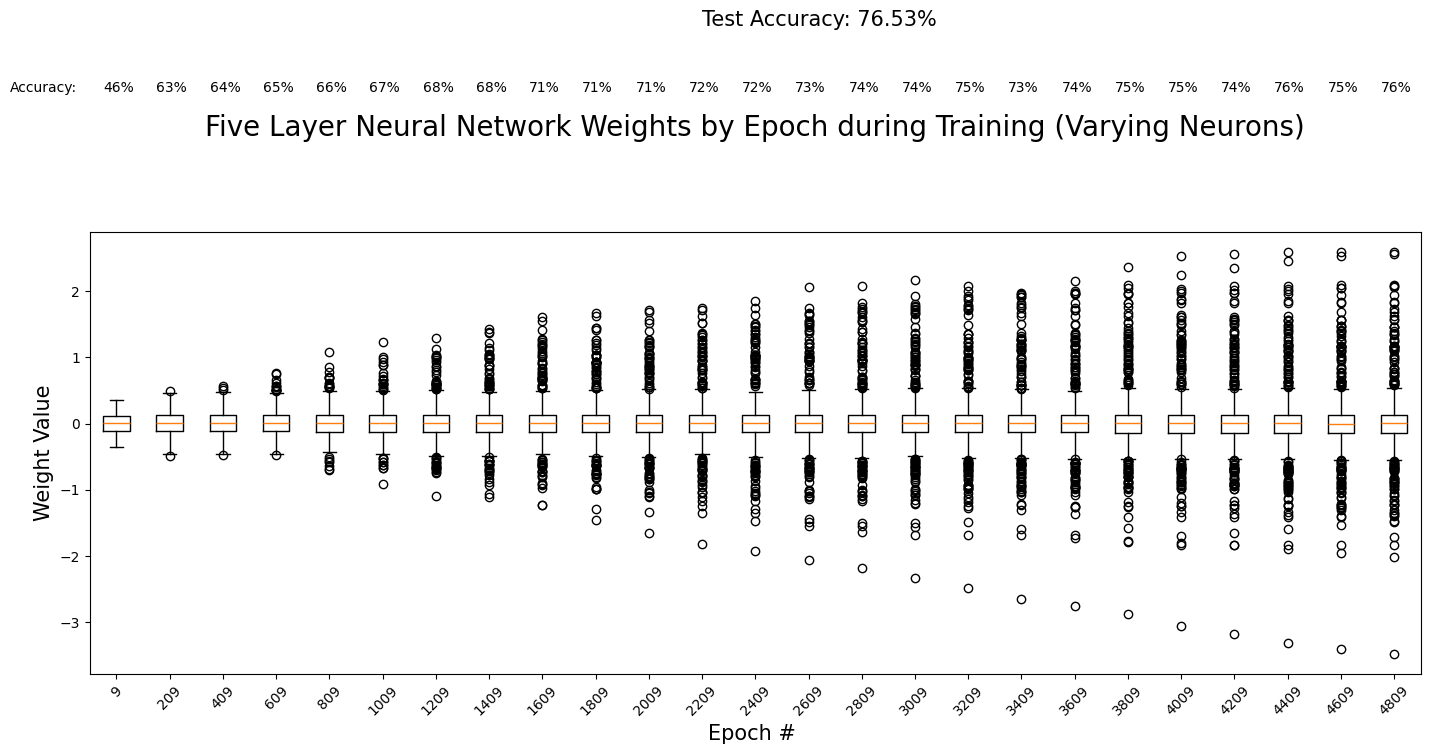

In [68]:
epoch_boxplot_dict = {"boxes":[], "x_labels":[]}
for i in range(0, condensed_weights_by_epoch_df.shape[0]):
    epoch_boxplot_dict["boxes"].append(condensed_weights_by_epoch_df.iloc[i, 1])
    epoch_boxplot_dict["x_labels"].append(condensed_weights_by_epoch_df.iloc[i, 0])

plt.figure(figsize=(15,7.5))
plt.boxplot(epoch_boxplot_dict['boxes'])
plt.title("Five Layer Neural Network Weights by Epoch during Training (Varying Neurons)", y =1.2, fontsize = 20)
plt.tight_layout(pad =5)
plt.text(12, 6, f"Test Accuracy: {model_test_acc:.2f}%", fontsize = 15)
plt.xlabel("Epoch # ", fontsize = 15)
x_position = .75
y_position = 5  
x_increment = 1 
for item in less_accuracy_by_epoch_df:
    plt.text(x_position, y_position, f"{item*100:.0f}%")
    x_position += x_increment
plt.text(-1, 5, "Accuracy:", fontsize = 10)
plt.xticks(range(1, len(epoch_boxplot_dict['x_labels']) + 1), epoch_boxplot_dict['x_labels'], rotation = 45, fontsize = 10)
plt.ylabel("Weight Value", fontsize = 15)

In [67]:
# for the first epoch recorded (epoch 9)
first_epoch = condensed_weights_by_epoch_df.iloc[0]

# midpoint
midpoint = condensed_weights_by_epoch_df.iloc[condensed_weights_by_epoch_df.shape[0] // 2]

# for the las epoch recorded (epoch 4809)
last_epoch = condensed_weights_by_epoch_df.iloc[-1]


Text(0.5, 1.0, 'Logistic Q-Q Plot')

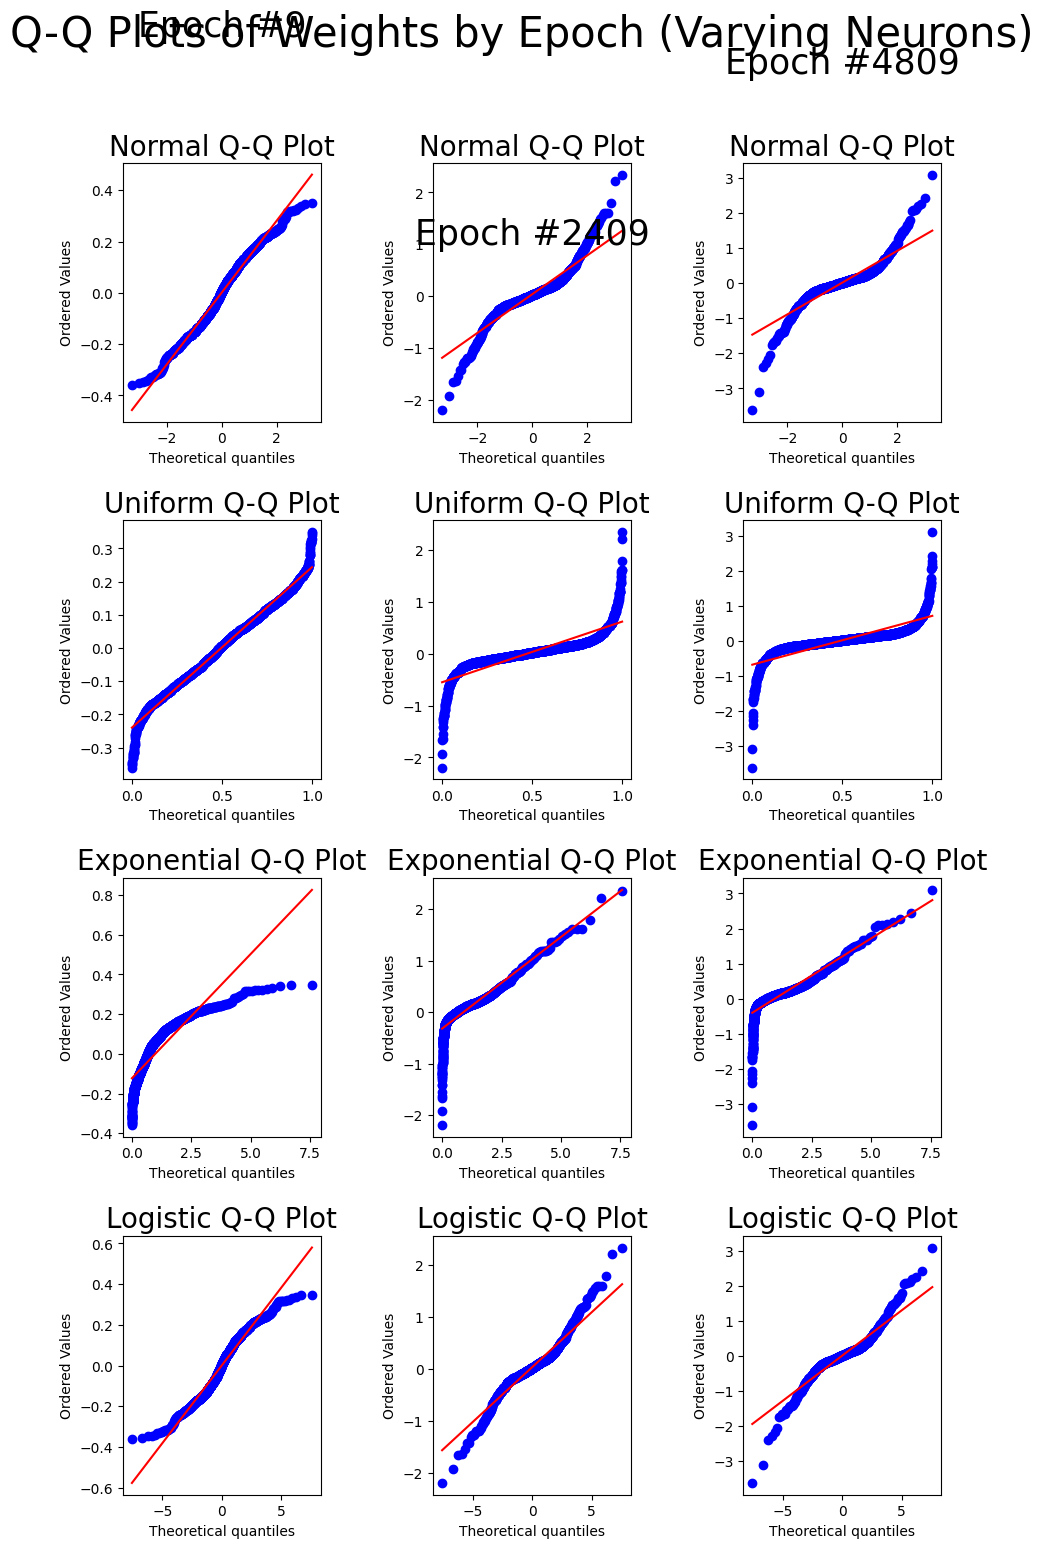

In [59]:
qq_points1 = first_epoch['all_weights_combined']
qq_points2 = midpoint['all_weights_combined']
qq_points3 = last_epoch['all_weights_combined']

fig, axes = plt.subplots(4, 3, figsize=(10, 15))
fig.tight_layout(pad=5)

fig.suptitle("Q-Q Plots of Weights by Epoch (Varying Neurons)", fontsize = 30, y = 1.05)

axes[0,0].text(0, 1, "Epoch #9", fontsize = 25, ha = "center")
stats.probplot(qq_points1, dist = "norm", plot = axes[0,0])
axes[0,0].set_title("Normal Q-Q Plot", fontsize = 20)
stats.probplot(qq_points1, dist = "uniform", plot = axes[1,0])
axes[1,0].set_title("Uniform Q-Q Plot", fontsize = 20)
stats.probplot(qq_points1, dist = "expon", plot = axes[2,0])
axes[2,0].set_title("Exponential Q-Q Plot", fontsize = 20)
stats.probplot(qq_points1, dist = "logistic", plot = axes[3,0])
axes[3,0].set_title("Logistic Q-Q Plot", fontsize = 20)

axes[0,1].text(0, 1, "Epoch #2409", fontsize = 25, ha = "center")
stats.probplot(qq_points2, dist = "norm", plot = axes[0,1])
axes[0,1].set_title("Normal Q-Q Plot", fontsize = 20)
stats.probplot(qq_points2, dist = "uniform", plot = axes[1,1])
axes[1,1].set_title("Uniform Q-Q Plot", fontsize = 20)
stats.probplot(qq_points2, dist = "expon", plot = axes[2,1])
axes[2,1].set_title("Exponential Q-Q Plot", fontsize = 20)
stats.probplot(qq_points2, dist = "logistic", plot = axes[3,1])
axes[3,1].set_title("Logistic Q-Q Plot", fontsize = 20)



axes[0,2].text(0, 6, "Epoch #4809", fontsize = 25, ha = "center")
stats.probplot(qq_points3, dist = "norm", plot = axes[0,2])
axes[0,2].set_title("Normal Q-Q Plot", fontsize = 20)
stats.probplot(qq_points3, dist = "uniform", plot = axes[1,2])
axes[1,2].set_title("Uniform Q-Q Plot", fontsize = 20)
stats.probplot(qq_points3, dist = "expon", plot = axes[2,2])
axes[2,2].set_title("Exponential Q-Q Plot", fontsize = 20)
stats.probplot(qq_points3, dist = "logistic", plot = axes[3,2])
axes[3,2].set_title("Logistic Q-Q Plot", fontsize = 20)



